# Repeated measures ANOVA    

Repeated measures ANOVA is the equivalent of one-way ANOVA, but for related, dependent groups, and its an extension of the [paired t-test](https://github.com/trangel/stats-with-python/blob/master/paired t-test.ipynb) to more than two repeated samples.    

## Usage
Repeated measures ANOVA is used in two kinds of experiments    
1. to analyze changes in mean scores over 3+ time points
2. to analyze differences in mean scores under 3+ different conditions    

##Contents:    
1. [Theory](#theory)   
2. [Numerical example](#example)

<a id='theory'></a>


### Assumptions:
1. The dependent variable must be continuous (interval/ratio)  
2. The observations are independent of one another.   
3. The dependent variable should be normally or approximately normally distributed.   
4. The dependent variable should not contain outliers.   

### Hypothesis
Null hypothesis   
$\mathcal{H}_0$ : $\mu_1 = \mu_2 = \mu_3 = \dots  = \mu_k$   
for $k$ groups   

Alternative hypothesis   
$\mathcal{H}_1$ :  at least two means are significantly different  

### Test method    

Steps     

$k = $ number of groups (times or conditions)    
$n = $ number of samples (must be equal for all groups)   

#### Sum of squares    

#### Sum of squares for groups $SS_\textrm{groups}$ 
A group is a time or a condition   

$SS_\textrm{groups} = \sum_{i=1}^k n_i(\overline{x}_i - \overline{x})^2$

$n_i = $ number of subjects under each $i^\textrm{th}$ group  
$\overline{x}_i = $ mean score for each ($i^\textrm{th}$ group  
$\overline{x} = $ grand mean

##### Sum of squares within groups $SS_\textrm{w}$
This is calculated in the same way as in an independent ANOVA    

$SS_\textrm{w} = \sum_1 ( x_{i1} - \overline{x}_1)^2  
+ \sum_2 ( x_{i2} - \overline{x}_2)^2  
+ \dots + \sum_k ( x_{i2k} - \overline{x}_k)^2 $


##### Sum of squares for subjects $SS_\textrm{subjects}$      
We treat each subject as a level of an independent factor called subjects,   
$SS_\textrm{subjects} = k \sum(\overline{x}_i - \overline{x})^2$   
$\overline{x}_i =$ mean of subject $i$    
$\overline{x} = $ grand mean

##### Sum of squares error $SS_\textrm{error}$    

$SS_\textrm{error} = SS_\textrm{w} - SS_\textrm{subjects}$


#### Mean sum of squares    
These are obtained by the sum of squares divided by the corresponding degrees of freedom   

##### Mean sum of squares for groups $MS_\textrm{groups}$    
$MS_\textrm{groups} = \frac{\displaystyle SS_\textrm{groups}}{k-1}$

##### Mean sum of squares for error $MS_\textrm{error}$   
$MS_\textrm{error} = \frac{\displaystyle SS_\textrm{error}}{(n-1)(k-1)}$

#### $F$-statistic:    
As in other tests, we calculate an $F$-statistic   

$F = \frac{\displaystyle MS_\textrm{groups}}{\displaystyle MS_\textrm{error}}$ 

The above will become more evindent with the following numerical example      


<a id='example'></a>
## Numerical example    
In this test, let's use a hypothethical example of blood glucose (BG) readings of persons with diabetes.    
The test is done three times, say before, within and after a given clinical treatment and we want to know if there is a significant difference within the groups (times).     

The database is not real but just to be used as a toy example.   
This contains BG readings (in mg/dL) for 40 persons with diabetes at different times.

In [1]:
import pandas as pd
import numpy as np
# This is to print in markdown style
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

df = pd.read_csv('./data/BG-db.csv',index_col=0)
df.columns=['before','during','after']
df.index.name='Subject'
df

,before,during,after
Subject,,,
0,79.250358,73.749442,82.709670
1,96.597034,82.233706,82.867249
2,97.391662,83.178994,83.073182
3,97.437917,87.440005,83.498685
4,99.582073,87.637852,83.639062
5,106.973556,87.798634,85.972862
6,108.755841,90.425577,86.388565
7,109.856949,91.364563,86.533211
8,110.307037,92.284228,86.752302


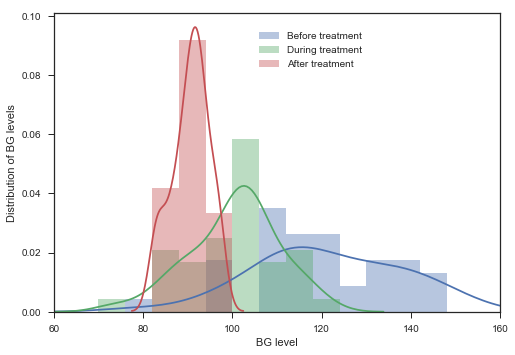

In [2]:
# Let's visualize the data
import matplotlib as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks")


bins = np.arange(70,150,6)

A = df['before'].values
B = df['during'].values
C = df['after'].values


# Show the results of a linear regression within each dataset
ax1 = sns.distplot(A,bins=bins,label='Before treatment')
ax2 = sns.distplot(B,bins=bins,label='During treatment')
ax3 = sns.distplot(C,bins=bins,label='After treatment')


plt.pyplot.xlabel('BG level')
plt.pyplot.ylabel('Distribution of BG levels')
plt.pyplot.legend(bbox_to_anchor=(0.45, 0.95), loc=2, borderaxespad=0.)

plt.pyplot.xlim((60,160))
plt.pyplot.show()

#### Sum of squares for groups $SS_\textrm{groups}$ 
In this example, a group refers to a time (before, during or after treatment).      

$SS_\textrm{groups} = \sum_{i=1}^k n_i(\overline{x}_i - \overline{x})^2$

$n_i = $ number of subjects under each $i^\textrm{th}$ group  
$\overline{x}_i = $ mean score for each ($i^\textrm{th}$ group  
$\overline{x} = $ grand mean

In [3]:
# Calculate means for each group
mu1 = df['before'].values.mean()
mu2 = df['during'].values.mean()
mu3 = df['after'].values.mean()

#Grand mean
mu = df.values.mean()

printmd('$\overline{{x}}_1 = {}$'.format(round(mu1,3)))
printmd('$\overline{{x}}_2 = {}$'.format(round(mu2,3)))
printmd('$\overline{{x}}_3 = {}$'.format(round(mu3,3)))
printmd('$\overline{{x}} = {}$'.format(round(mu,3)))

# Number of samples for each group:
n = len(df)
# Here the number of samples is the same for all groups:
n1 = n
n2 = n
n3 = n

# SS groups:
SSgroups= n1*(mu1-mu)**2 + n2*(mu2-mu)**2 + n3*(mu3-mu)**2
printmd("$SS_{{groups}} = {}$".format(round(SSgroups,3)))

$\overline{x}_1 = 121.232$

$\overline{x}_2 = 100.435$

$\overline{x}_3 = 90.623$

$\overline{x} = 104.097$

$SS_{groups} = 19542.809$

##### Sum of squares within groups $SS_\textrm{w}$

$SS_\textrm{w} = \sum_1 ( x_{i1} - \overline{x}_1)^2  
+ \sum_2 ( x_{i2} - \overline{x}_2)^2  
+ \dots + \sum_k ( x_{i2k} - \overline{x}_k)^2 $

This might be more difficult to understand, so let's make this in steps.   
Let's calculate the sum of squares for the first group   

In [4]:
# Group 1 is a column of the dataset (Before):   
group1 = df['before'].values
# Take mean value for this group
mu1 = group1.mean() 
# Now calculate sum (x - mu1)^2 for all x values in this group:
ss_group1 = np.sum((group1-mu1)**2)
printmd('SS for group 1 ={}'.format(ss_group1))

SS for group 1 =10410.204005249998

Repeat the same operation for other groups, and the sum gives $SS_w$

In [5]:
group2 = df['during'].values
# Take mean value for this group
mu2 = group2.mean() 
# Now calculate sum (x - mu1)^2 for all x values in this group:
ss_group2 = np.sum((group2-mu2)**2)
printmd('SS for group 2 ={}'.format(ss_group2))
#
group3 = df['after'].values
# Take mean value for this group
mu3 = group3.mean() 
# Now calculate sum (x - mu1)^2 for all x values in this group:
ss_group3 = np.sum((group3-mu3)**2)
printmd('SS for group 3 ={}'.format(ss_group3))
#
SSw = ss_group1 + ss_group2 + ss_group3
printmd('$SS_w = {}$'.format(round(SSw,3)))

SS for group 2 =3895.803595844936

SS for group 3 =657.2726913888212

$SS_w = 14963.28$

##### Sum of squares for subjects $SS_\textrm{subjects}$      
We treat each subject as a level of an independent factor called subjects,   
$SS_\textrm{subjects} = k \sum(\overline{x}_i - \overline{x})^2$   
$\overline{x}_i =$ mean of subject $i$    
$\overline{x} = $ grand mean

In [6]:
# Let's calculate the subject means, i.e., the means for each row in our dataframe  

def subject_mean(a,b,c):
    '''Returns mean value of 3 numbers'''
    return float((a+b+c)/3.0)

df['Subject means'] = df.apply(lambda row: subject_mean(row['before'],row['during'],row['after']), axis = 1)
df.head()

,before,during,after,Subject means
Subject,,,,
0,79.250358,73.749442,82.709670,78.569823
1,96.597034,82.233706,82.867249,87.232663
2,97.391662,83.178994,83.073182,87.881279
3,97.437917,87.440005,83.498685,89.458869
4,99.582073,87.637852,83.639062,90.286329


In [7]:
k=3.0
subject_means = df['Subject means'].values
SSsubjects = k * np.sum( (subject_means - mu)**2 )

printmd('$SS_{{subjects}} = {}$'.format(round(SSsubjects,3)))

$SS_{subjects} = 11855.0$

##### Sum of squares error $SS_\textrm{error}$    

$SS_\textrm{error} = SS_\textrm{w} - SS_\textrm{subjects}$


In [8]:
SSerror = SSw - SSsubjects
printmd('$SS_{{error}} = {}$'.format(round(SSerror,3)))

$SS_{error} = 3108.28$

##### Determine MS and the F-statistic

##### Mean sum of squares for groups $MS_\textrm{groups}$    
$MS_\textrm{groups} = \frac{\displaystyle SS_\textrm{groups}}{k-1}$

##### Mean sum of squares for error $MS_\textrm{error}$   
$MS_\textrm{error} = \frac{\displaystyle SS_\textrm{error}}{(n-1)(k-1)}$

#### $F$-statistic:    
As in other tests, we calculate an $F$-statistic   

$F = \frac{\displaystyle MS_\textrm{groups}}{\displaystyle MS_\textrm{error}}$ 


In [9]:
# Degrees of freedom for groups:
df1 = k-1
# Degrees of freedom for error
df2 = (n-1)*(k-1)

MSgroups = SSgroups/df1

MSerror = SSerror/df2

Fstatistic = MSgroups/MSerror

printmd('$MS_{{groups}} = {}$'.format(round(MSgroups,3)))
printmd('$MS_{{error}} = {}$'.format(round(MSerror,3)))
printmd('$F$-statistic $= {}$'.format(round(Fstatistic,3)))
printmd('DF1 = {}, DF2 = {}'.format(int(df1),int(df2)))

$MS_{groups} = 9771.405$

$MS_{error} = 39.85$

$F$-statistic $= 245.206$

DF1 = 2, DF2 = 78

Now, look at the table for the probability associated to the F-statistic with degrees of freedom DF1 and DF2, and significance of 0.05  



In this case,
$F(2,78) = 245$   
From the [F-distribution calculator](http://stattrek.com/online-calculator/f-distribution.aspx), the    
p-value for $F > 245 = 0$, or virtually $0$
Therefore, we can safely reject the null hypothesis.

To my knowledge there is no scipy implementation of repeated measures ANOVA.  